In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [18]:
data = pd.read_csv("added_other_features_final.csv")
data = data.drop(columns=['date','year','getSUBTLWordScores' ],axis=1)

In [19]:
data.head(5)

,CC,CD,DT,FW,IN,JJ,MD,NN,NNS,NNP,...,H_S,BM,TTR,SICH,A_R_I,F_K_R,getFamiliarityScore,getConcretenessScore,getImagabilityScore,getAoaScore
0,6,12,240,7,36,345,4,2094,0,506,...,26.654257,14.896320,30.629371,14.611872,5,6,600.909091,300.444444,353.681818,2.699545
1,51,59,1919,68,369,2887,21,16267,15,3458,...,21.060573,14.960296,20.806962,18.631179,12,18,625.459459,334.202247,356.290541,2.813716
2,44,58,1330,48,331,1839,25,10869,17,2227,...,22.804109,15.251379,22.356495,15.810811,11,16,621.897436,334.069767,338.217949,2.802949
3,76,247,1946,44,313,2995,38,16966,21,3744,...,23.002535,14.871957,20.582878,16.017699,7,12,627.807692,332.955224,287.495192,2.847260
4,31,95,1123,38,158,1647,58,8978,11,2071,...,22.958584,15.722231,21.211150,14.501511,6,8,626.095238,327.437500,315.061224,2.830204


In [20]:
label_encoder = LabelEncoder()
data.iloc[:,1] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

In [21]:
corr = data.corr()

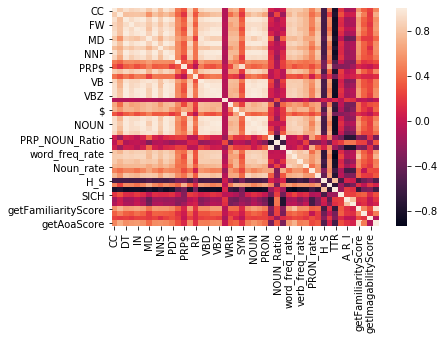

In [22]:
sns.heatmap(corr)

In [23]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.95:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [24]:
data.to_csv (r'heatmap.csv', index = False, header=True)